<a href="https://colab.research.google.com/github/oyeankit/Detecting-Fraud-Using-Machine-Learning-and-Data-Visualization/blob/main/Airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import joblib

In [20]:
dataframe = pd.read_csv('/content/AirQuality.csv', sep=';', decimal=',')

In [11]:
dataframe = dataframe.loc[:, ~dataframe.columns.str.contains('^Unnamed')]


In [12]:
print("Available columns after cleaning:", dataframe.columns.tolist())


Available columns after cleaning: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [13]:
numeric_columns = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                  'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                  'PT08.S5(O3)', 'T', 'RH', 'AH']


In [14]:
X = dataframe[numeric_columns]
y = dataframe['CO(GT)']


In [15]:
print("\nMissing values before imputation:")
print("X missing:", X.isnull().sum())
print("y missing:", y.isnull().sum())


Missing values before imputation:
X missing: PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64
y missing: 114


Handle Missing Values

In [16]:
imputer = SimpleImputer(strategy='mean')

In [26]:
# Impute X
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Impute y
y = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).ravel())

# Print missing values after imputation
print("\nMissing values after imputation:")
print("X missing:", X.isnull().sum().sum())
print("y missing:", y.isnull().sum())



Missing values after imputation:
X missing: 0
y missing: 0


Split the data


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Create and train random fores model

In [32]:
f_model = RandomForestRegressor(n_estimators=100,max_depth=None,random_state=42)

In [33]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Prediction


In [34]:
y_pred = rf_model.predict(X_test)

Evaluation

In [35]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
#print performance metrics now

In [36]:
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Squared Error: 2135.1784
Root Mean Squared Error: 46.2080
Mean Absolute Error: 23.0237
R² Score: 0.6163


In [38]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns,'importance': rf_model.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Feature Importance:
          feature  importance
4         NOx(GT)    0.503260
9               T    0.061713
7    PT08.S4(NO2)    0.058230
0     PT08.S1(CO)    0.058048
5    PT08.S3(NOx)    0.053522
8     PT08.S5(O3)    0.051418
11             AH    0.050524
10             RH    0.048266
6         NO2(GT)    0.042824
3   PT08.S2(NMHC)    0.036284
2        C6H6(GT)    0.019585
1        NMHC(GT)    0.016326


Visualization

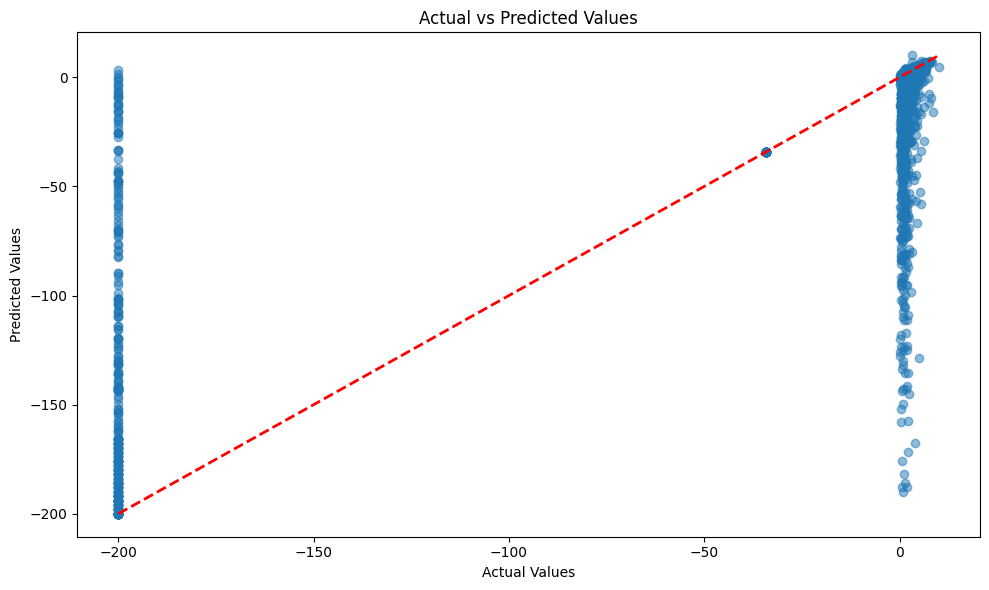

In [39]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

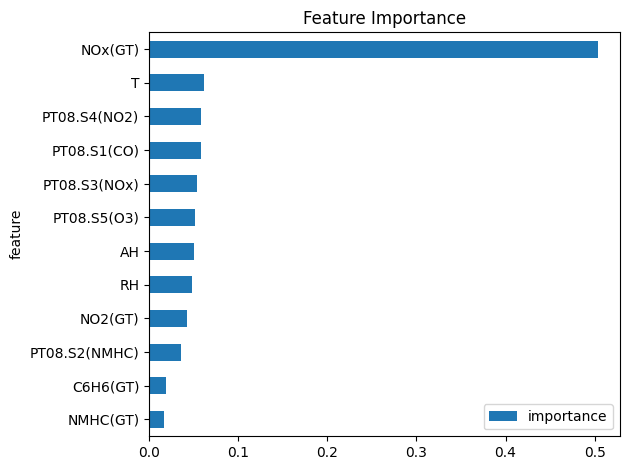

In [42]:
plt.figure(figsize=(10, 6))
feature_importance.sort_values('importance', ascending=True).plot(
    kind='barh', x='feature', y='importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [43]:
# Save the model
import joblib
joblib.dump(rf_model, 'random_forest_model.joblib')
print("\nModel saved as 'random_forest_model.joblib'")


Model saved as 'random_forest_model.joblib'


In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

LSTM Model

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [64]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_normalized = X_scaler.fit_transform(X)
y_normalized = y_scaler.fit_transform(y.values.reshape(-1, 1))


In [65]:
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [66]:
time_steps = 10
X_seq, y_seq = create_sequences(X_normalized, y_normalized, time_steps)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42
)


In [68]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 50)              │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,851 (128.32 KB)

 Trainable params: 32,851 (128.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.2078 - mae: 0.3549 - val_loss: 0.0711 - val_mae: 0.1603
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0817 - mae: 0.1947 - val_loss: 0.0706 - val_mae: 0.1898
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0745 - mae: 0.1768 - val_loss: 0.0657 - val_mae: 0.1596
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0679 - mae: 0.1662 - val_loss: 0.0629 - val_mae: 0.1484
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0716 - mae: 0.1685 - val_loss: 0.0629 - val_mae: 0.1618
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0662 - mae: 0.1619 - val_loss: 0.0619 - val_mae: 0.1573
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0659 - mae: 0.1610 - val_loss: 0.0597 - val_mae: 0.1200
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0638 - mae: 0.1562 - val_loss: 0.0591 - val_mae: 0.1395
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━━━━━━

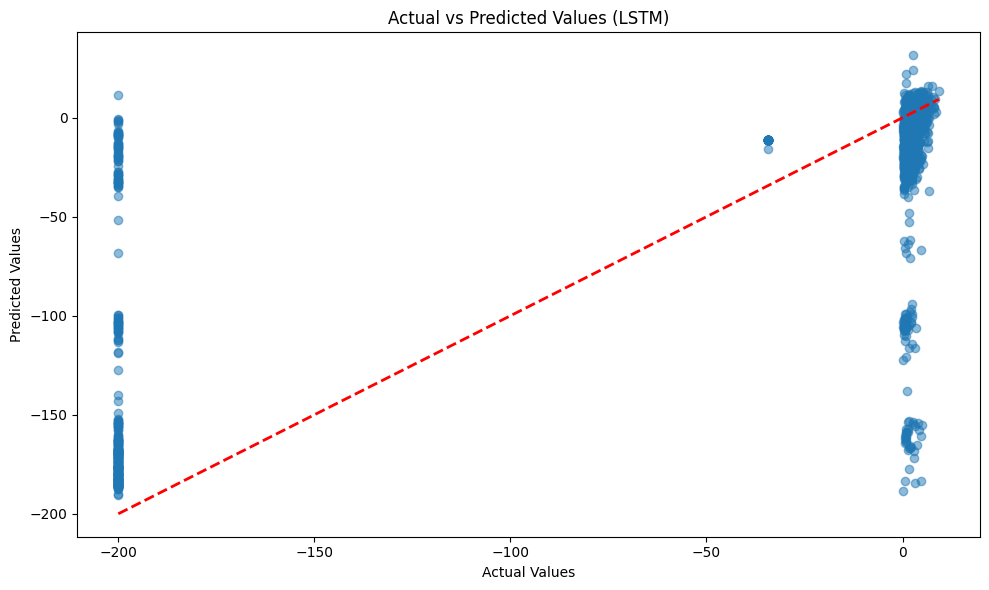

In [73]:
#for LSTM
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

#sequence length
time_steps = 10
X_seq, y_seq = create_sequences(X_normalized, y_normalized, time_steps)

# Spliting the data for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42
)

# LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Print model summary
model.summary()

# Train the model with early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions with LSTM
y_pred_lstm = model.predict(X_test_lstm)

# Inverse transform predictions and actual values
y_pred_lstm_original = y_scaler.inverse_transform(y_pred_lstm)
y_test_lstm_original = y_scaler.inverse_transform(y_test_lstm)

# Evaluate the LSTM model
mse_lstm = np.mean((y_test_lstm_original - y_pred_lstm_original) ** 2)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = np.mean(np.abs(y_test_lstm_original - y_pred_lstm_original))
r2_lstm = 1 - np.sum((y_test_lstm_original - y_pred_lstm_original) ** 2) / np.sum((y_test_lstm_original - np.mean(y_test_lstm_original)) ** 2)

print("\nLSTM Model Performance:")
print(f"Mean Squared Error: {mse_lstm:.4f}")
print(f"Root Mean Squared Error: {rmse_lstm:.4f}")
print(f"Mean Absolute Error: {mae_lstm:.4f}")
print(f"R² Score: {r2_lstm:.4f}")

# Visualizations for LSTM
plt.figure(figsize=(10, 6))
plt.scatter(y_test_lstm_original, y_pred_lstm_original, alpha=0.5)
plt.plot([y_test_lstm_original.min(), y_test_lstm_original.max()],
         [y_test_lstm_original.min(), y_test_lstm_original.max()],
         'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (LSTM)')
plt.tight_layout()
plt.show()

In [79]:
#Save the model
joblib.dump(rf_model, 'random_forest_model.joblib')
model.save('lstm_model.h5')
joblib.dump(X_scaler, 'X_scaler.joblib')
joblib.dump(y_scaler, 'y_scaler.joblib')

print("\nModels saved as 'random_forest_model.joblib' and 'lstm_model.h5'")


Models saved as 'random_forest_model.joblib' and 'lstm_model.h5'
